In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv('train_news.csv')
df

,Unnamed: 0,id,headline,written_by,news,label
0,0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1
...,...,...,...,...,...,...
20795,20795,5671,NaN,NeverSurrender,"No, you'll be a dog licking of the vomit of yo...",1
20796,20796,14831,Albert Pike and the European Migrant Crisis,Rixon Stewart,"By Rixon Stewart on November 5, 2016 Rixon Ste...",1
20797,20797,18142,Dakota Access Caught Infiltrating Protests to ...,Eddy Lavine,posted by Eddie You know the Dakota Access Pip...,1
20798,20798,12139,How to Stretch the Summer Solstice - The New Y...,Alison S. Cohn,"It’s officially summer, and the Society Boutiq...",0


In [2]:
df.drop(['Unnamed: 0','id','headline','written_by'],axis=1)

,news,label
0,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,HOUSTON — Venezuela had a plan. It was a ta...,0
2,"Sunday on ABC’s “This Week,” while discussing ...",0
3,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,Finian Cunningham has written extensively on...,1
...,...,...
20795,"No, you'll be a dog licking of the vomit of yo...",1
20796,"By Rixon Stewart on November 5, 2016 Rixon Ste...",1
20797,posted by Eddie You know the Dakota Access Pip...,1
20798,"It’s officially summer, and the Society Boutiq...",0


In [8]:
#A1
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import pandas as pd
df['news'] = df['news'].fillna('')
x = df['news']
y = df['label']
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=50)
vectorize=CountVectorizer()
x_train_vect = vectorize.fit_transform(train_x)
x_test_vect = vectorize.transform(test_x)
merged_x_vect = vectorize.transform(pd.concat([train_x, test_x], axis=0, ignore_index=True))
k = 3
kmeans_cluster = KMeans(n_clusters=k, random_state=50)
kmeans_cluster.fit(merged_x_vect)
df['clusters'] = kmeans_cluster.predict(merged_x_vect)
print(df)

C:\Users\madhu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


       Unnamed: 0     id                                           headline  \
0               0   9653  Ethics Questions Dogged Agriculture Nominee as...   
1               1  10041  U.S. Must Dig Deep to Stop Argentina’s Lionel ...   
2               2  19113  Cotton to House: ’Do Not Walk the Plank and Vo...   
3               3   6868  Paul LePage, Besieged Maine Governor, Sends Co...   
4               4   7596                       A Digital 9/11 If Trump Wins   
...           ...    ...                                                ...   
20795       20795   5671                                                NaN   
20796       20796  14831        Albert Pike and the European Migrant Crisis   
20797       20797  18142  Dakota Access Caught Infiltrating Protests to ...   
20798       20798  12139  How to Stretch the Summer Solstice - The New Y...   
20799       20799  15660  Emory University to Pay for ’100 Percent’ of U...   

                       written_by  \
0      Eric Li

In [7]:
df

,news,label,clusters
0,Hamas has arrested owners of tunnels along the...,0,1
1,advocates have begun boycotting scheduled “s...,0,1
2,The corporate owner of Sears and Kmart said on...,0,1
3,Report: Trump hosted cocaine-fueled parties wi...,1,1
4,"MASONVILLE, Iowa — Lavern Kelchen stood in ...",0,1
...,...,...,...
20795,SAN FRANCISCO (AP) — Federal immigration of...,0,1
20796,A new report shows that only seven out of 10 o...,0,1
20797,Home › POLITICS › DON’T LET DEBBIE WASSERMAN S...,1,1
20798,Cancers of the colon and rectum have been decl...,0,0


C:\Users\madhu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


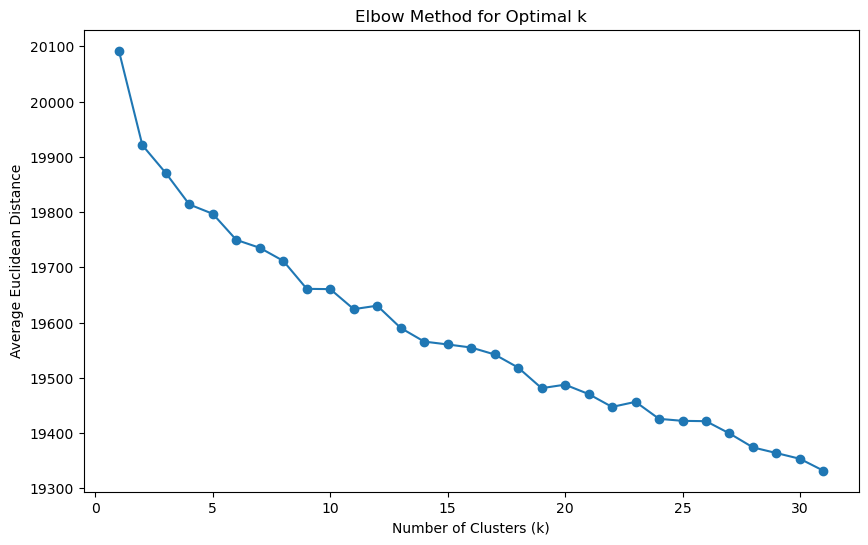

In [5]:
#A2
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
data = df['headline'].dropna()
vectorize= TfidfVectorizer(stop_words='english')
X = vectorize.fit_transform(data)
k_values = range(1, 32)
distortions = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)
plt.figure(figsize=(10, 6))
plt.plot(k_values, distortions, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Euclidean Distance')
plt.show()


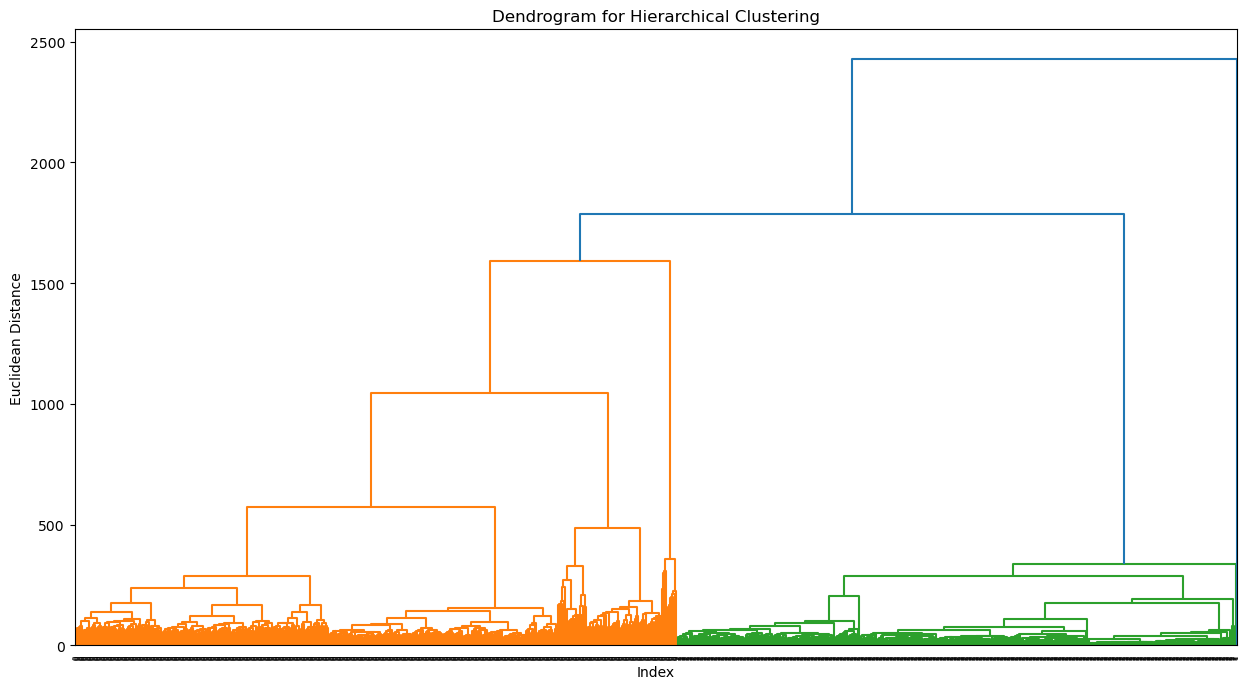

In [11]:
#A3
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
subset_size = 1000
subset_indices = np.random.choice(merged_x_vect.shape[0], size=subset_size, replace=False)
subset_data = merged_x_vect[subset_indices, :]
k = 3 
agglomerative_cluster = AgglomerativeClustering(n_clusters=k)
cluster_labels = agglomerative_cluster.fit_predict(subset_data.toarray())  # Convert to dense array
link = linkage(subset_data.toarray(), 'ward')
plt.figure(figsize=(15, 8))
dendrogram(link, orientation='top', labels=cluster_labels, distance_sort='descending', show_leaf_counts=True)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Index")
plt.ylabel("Euclidean Distance")
plt.show()


In [9]:
df.columns

Index(['Unnamed: 0', 'id', 'headline', 'written_by', 'news', 'label',
       'clusters'],
      dtype='object')

In [ ]:
#A4
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
x= df.drop(['Unnamed: 0', 'id', 'headline', 'written_by', 'news', 'label'], axis=1)
y = df['label']
train_x,test_x,train_y,test_y = train_test_split(x, y, test_size=0.2, random_state=50)
rf_classifier = RandomForestClassifier()
num_features_to_select=2
sfs = SequentialFeatureSelector(estimator=rf_classifier, n_features_to_select=num_features_to_select, direction='forward')
sfs.fit(x_train_vect,train_y)
selected_features = train_x.columns[sfs.support_]
print("Selected Features:", selected_features)


In [ ]:
#A5
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(X_train_vect.toarray())
cumulative_var_ratio = pca.explained_variance_ratio_.cumsum()
num_components_for_95_var = (cumulative_var_ratio <= 0.95).sum() + 1
pca = PCA(n_components=num_components_for_95_var)
x_selected = pca.fit_transform(x_train_vect.toarray())
print("Number of components needed to capture 95% of variance:", num_components_for_95_var)
print("Explained variance ratio for each component:", pca.explained_variance_ratio_)


In [ ]:
#A6
from sklearn.linear_model import LogisticRegression
pca = PCA(n_components=your_chosen_num_components)
x_train_pca = pca.fit_transform(x_train.toarray())
x_test_pca = pca.transform(x_test.toarray())
model = LogisticRegression(random_state=42)
model.fit(x_train_pca, y_train)
y_pred = model.predict(x_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on the transformed dataset:", accuracy)
